In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. 데이터 정리

In [127]:
import pandas as pd
import seaborn as sns
import numpy as np


from sklearn.preprocessing import StandardScaler

filename = '/content/drive/MyDrive/vgames2.csv'

df = pd.read_csv(filename)
df = df.loc[:,'Name':'Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


비교에 앞서 판매량 데이터가 통일되있지 않기 때문에 정리가 필요하다. 

우선 전체 데이터의 결측치를 제거한 후에

In [128]:
#결측치 제거
df = df.dropna()

판매량 데이터가 어떤 정리가 필요한지 알아보자 



In [ ]:
df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

M 은 백만 단위, K 는 천 단위 이므로
M은 곱하기 1,000,000, K는 곱하기 1,000 로 변환 가능하다
하지만 실수나 정수인 데이터인 경우가 있는데 이를 확인하기 위해선
다른 데이터가 필요하다.


2006년도 "Wii Sports" 의 출고량
2006년도 11월에 출시되었으며 판매량은 8288만 이다 #출처가 나무위키이지만 그렇게 중요한 부분이 아니므로 넘어가겠다
출처 https://namu.wiki/w/Wii%20%EC%8A%A4%ED%8F%AC%EC%B8%A0

dataset에 따르면 41.49,	29.02,	3.77,	8.46 이다 (NA_Sales, EU_Sales, JP_Sales, Other_Sales 순)
이는 82.74이고 M 을 붙인다면 82.74M, 8274만 이므로 위에서 찾은 숫자와 얼추 맞는 수치이다.

In [ ]:
#확인
df.loc[df['Name'] == 'Wii Sports']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46


그렇다면 숫자에 M이 붙은 데이터는 얼마나 되는 수치일까

일단 M 이 붙은 게임들을 출력

In [ ]:
#df.info()

df[df['NA_Sales'].str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16152,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
16169,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16408,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


보이는 이름들 중 제 기준으로 제일 유명한 Mario Kart 64 출시년도 1996년

In [ ]:
df.loc[df['Name'] == 'Mario Kart 64']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15


1996년 12월 14일에 발매된 Mario Kart 64 의 판매량은 987만장이다. 

dataset에 따르면 5.55M	1.94	2.23	0.15 이다. 
이는 총합 9.87 이고 M을 붙인다면 9.87M, 987만 이므로 정확히 떨어지는 수치이다.
출처 나무위키 https://namu.wiki/w/%EB%A7%88%EB%A6%AC%EC%98%A4%20%EC%B9%B4%ED%8A%B8%2064

그렇다면 숫자에 K가 붙은 데이터는 얼마나 되는 수치일까

일단 K가 붙은 게임들을 출력

In [ ]:
df[df['NA_Sales'].str.contains('K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


보이는 이름들 중 아는 게임이 없으므로 순차적으로 배열해봤다

In [ ]:
df_kSales = df[df['NA_Sales'].str.contains('K')]
df_kSales.sort_values(by = 'NA_Sales', ascending= False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14347,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90K,0,0,0.01
13798,King of Clubs: Mini Golf,Wii,2008.0,Sports,Oxygen Interactive,90K,0,0,0.01
13057,Mark Davis Pro Bass Challenge,PS2,2002.0,Sports,Natsume,90K,0.07,0,0.02
7023,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,820K,0.65,0,190K
7109,Dora's Big Birthday Adventure,DS,2010.0,Misc,Take-Two Interactive,80K,0.01,0,0.01
...,...,...,...,...,...,...,...,...,...
8189,Shining Force III: Scenario 2,SAT,1998.0,Strategy,Sega,0K,0,0.05,0
9566,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0K,0,0.01,0
9437,Rakushou! Pachi-Slot Sengen 6: Rio 2 Cruising ...,PS2,2009.0,Misc,Tecmo Koei,0K,0,0.01,0
8579,Derby Stallion 96,SNES,1996.0,Sports,ASCII Entertainment,0K,0,1.04,0.01


제 기준으로 가장 유명한 Starcraft II: Heart of the Swarm 출시년 2013

In [ ]:
df[df['Name'] == 'StarCraft II: Heart of the Swarm']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7023,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,820000.0,650000.0,0.0,190000.0


2013년에 발매된 StarCraft II: Heart of the Swarm 는 48시간 내에 110만장이 판매되었다고한다. 
출처 나무위키 https://namu.wiki/w/%EC%8A%A4%ED%83%80%ED%81%AC%EB%9E%98%ED%94%84%ED%8A%B8%202/%ED%9D%A5%ED%96%89

dataset에 따르면 820 k, 0.65, 0, 190K 이므로 (0.65 는 650K) 총합 1,660 K 즉166만장 이다.
48시간안에 110만장이므로 166만장은 납득할만한 숫자라 생각한다.

#그러므로 아래와 같은 함수를 만들 수 있다.

In [129]:
def toInt(string):
      if 'K' in string:
        return float(string.replace('K','')) * 1000
      if 'M' in string:
        return float(string.replace('M','')) * 1000000
      else :
        return float(string) * 1000000
    

df['NA_Sales']= df['NA_Sales'].apply(toInt)
df['EU_Sales']= df['EU_Sales'].apply(toInt)
df['JP_Sales']= df['JP_Sales'].apply(toInt)
df['Other_Sales']= df['Other_Sales'].apply(toInt)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


연도 또한 데이터가 통일되어있지않다.

In [125]:
df.groupby('Year').sum().head(30)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
0.0,60000.0,40000.0,200000.0,10000.0
1.0,1110000.0,870000.0,0.0,290000.0
2.0,70000.0,50000.0,70000.0,20000.0
3.0,2500000.0,1600000.0,260000.0,460000.0
4.0,660000.0,240000.0,50000.0,60000.0
5.0,210000.0,30000.0,400000.0,10000.0
6.0,2800000.0,780000.0,30000.0,320000.0
7.0,390000.0,30000.0,0.0,30000.0
8.0,1310000.0,600000.0,30000.0,230000.0


차트에서 추측할 수 있듯, 0 에서 부터 16까지는 2000년도로 알 수 있고
86 부터 98은 1900년도로 알 수있다. 

#그러므로 아래와 같은 함수를 만들수있다.

In [130]:

df[['Year']] = df[['Year']].astype(int)

def toYear(int):
  if 0<= int & int <17:
    return int + 2000
  elif 86<= int & int <=98 :
    return int + 1900
  else :
    return int

df['Year'] = df['Year'].apply(toYear)
df.groupby('Year').sum().head(30)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10130000.0,640000.0,0.0,110000.0
1981,33400000.0,1960000.0,0.0,320000.0
1982,26920000.0,1650000.0,0.0,310000.0
1983,7760000.0,800000.0,8100000.0,140000.0
1984,33280000.0,2100000.0,14270000.0,700000.0
1985,33730000.0,4740000.0,14560000.0,920000.0
1986,12500000.0,2840000.0,19810000.0,1930000.0
1987,8460000.0,1410000.0,11630000.0,200000.0
1988,23870000.0,6590000.0,15760000.0,990000.0


#Q1. 지역에 따라서 선호하는 게임 장르가 다를까

지역들(NA, EU, JP, & Other) 과 Genre 를 비교해야한다.

In [131]:
df_Genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

df_Q1 = df_Genre.groupby('Genre').sum()
df_Q1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0


#Genre 와 지역간의 '연관성'을 파악해야하므로 
#Two sample chi square test 를 진행

귀무가설: 지역과 장르는 연관이 없다.
대립가설: 지역과 장르는 연관이 있다.

만약 p-value가 0.05 보다 작으면 귀무가설을 기각, 즉 지역과 장르는 연관이 있다

In [ ]:
from scipy.stats import chi2_contingency

print(chi2_contingency(df_Q1, correction = False))
print(chi2_contingency(df_Q1, correction = True))

(684336340.5169278, 0.0, 33, array([[8.42668371e+08, 4.68299745e+08, 2.48746271e+08, 1.53265612e+08],
       [1.15121748e+08, 6.39771079e+07, 3.39826515e+07, 2.09384923e+07],
       [2.18191181e+08, 1.21256330e+08, 6.44075945e+07, 3.96848939e+07],
       [3.83558786e+08, 2.13156786e+08, 1.13222261e+08, 6.97621676e+07],
       [4.07314145e+08, 2.26358455e+08, 1.20234577e+08, 7.40828230e+07],
       [1.18422607e+08, 6.58115084e+07, 3.49570281e+07, 2.15388567e+07],
       [3.55444916e+08, 1.97532943e+08, 1.04923361e+08, 6.46487805e+07],
       [4.43480930e+08, 2.46457579e+08, 1.30910607e+08, 8.06608845e+07],
       [5.04106536e+08, 2.80149309e+08, 1.48806607e+08, 9.16875480e+07],
       [1.91498992e+08, 1.06422565e+08, 5.65283591e+07, 3.48300841e+07],
       [6.42137522e+08, 3.56857867e+08, 1.89551809e+08, 1.16792802e+08],
       [8.50942655e+07, 4.72898048e+07, 2.51188747e+07, 1.54770550e+07]]))
(684336340.5169278, 0.0, 33, array([[8.42668371e+08, 4.68299745e+08, 2.48746271e+08, 1.532656

두 경우 모두 p value 가 0.0 이 뜬다. 매우 작은 숫자라고 가정, 귀무가설을 기각
즉 장르와 지역은 연관성이 있다. 다른 말로는 지역에 따라 선호하는 장르 트렌드가 있다 이다.

이제 각 지역별로 선호하는 장르를 알아본 후 트렌드를 알아보자.

# 북미의 게임 장르 선호도이다

In [ ]:
df_Q1['NA_Sales'].sort_values(ascending = False)

Genre
Action          874810000.0
Sports          680520000.0
Shooter         581920000.0
Platform        446440000.0
Misc            408050000.0
Racing          357190000.0
Role-Playing    319540000.0
Fighting        223200000.0
Simulation      182960000.0
Puzzle          123350000.0
Adventure       105660000.0
Strategy         68700000.0
Name: NA_Sales, dtype: float64

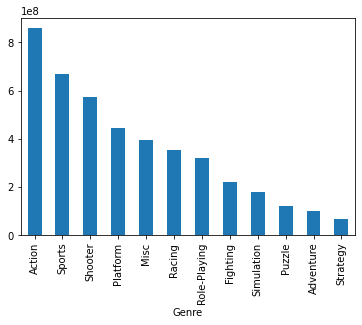

In [ ]:
df_Q1['NA_Sales'].sort_values(ascending = False).T.plot.bar()

Action의 판매량이 가장 높고 순차적으로 Sports, Shooter, Platform 순이다.

# 유럽의 게임 장르 선호도이다

In [ ]:
df_Q1['EU_Sales'].sort_values(ascending = False)


Genre
Action          522160000.0
Sports          376480000.0
Shooter         313050000.0
Racing          237100000.0
Misc            212360000.0
Platform        201610000.0
Role-Playing    183580000.0
Simulation      113350000.0
Fighting        101220000.0
Adventure        64050000.0
Puzzle           50730000.0
Strategy         45320000.0
Name: EU_Sales, dtype: float64

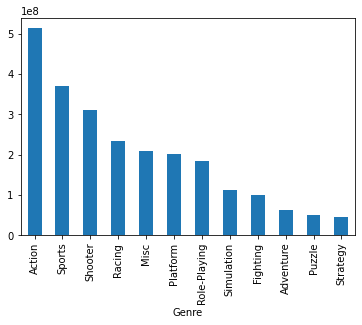

In [ ]:
df_Q1['EU_Sales'].sort_values(ascending = False).T.plot.bar()

Action의 판매량이 가장 높고 순차적으로 Sports, Shooter, Racing 순이다.

# 일본의 게임 장르 선호도이다

In [ ]:
df_Q1['JP_Sales'].sort_values(ascending = False)

Genre
Role-Playing    344950000.0
Action          157900000.0
Sports          135370000.0
Platform        130650000.0
Misc            105270000.0
Fighting         87340000.0
Simulation       63700000.0
Puzzle           56870000.0
Racing           56400000.0
Adventure        51950000.0
Strategy         49460000.0
Shooter          38280000.0
Name: JP_Sales, dtype: float64

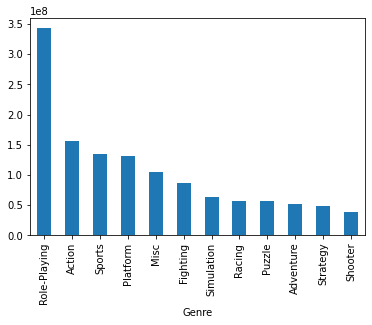

In [ ]:
df_Q1['JP_Sales'].sort_values(ascending = False).T.plot.bar()

Role-Playing의 판매량이 가장 높고 순차적으로 Action, Sports, Platform 순이다.

# 그 외 다른 지역의 게임 장르 선호도이다 

In [ ]:
df_Q1['Other_Sales'].sort_values(ascending = False)

Genre
Action          186450000.0
Sports          134670000.0
Shooter         102650000.0
Racing           77100000.0
Misc             74040000.0
Role-Playing     56960000.0
Platform         51530000.0
Fighting         36640000.0
Simulation       31480000.0
Adventure        16810000.0
Puzzle           12520000.0
Strategy         11360000.0
Name: Other_Sales, dtype: float64

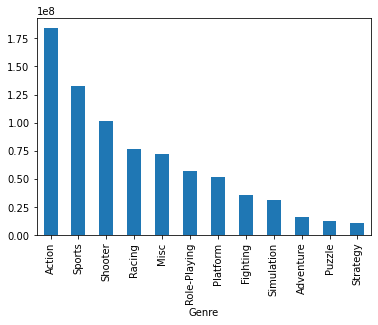

In [ ]:
df_Q1['Other_Sales'].sort_values(ascending = False).T.plot.bar()

Action의 판매량이 가장 높고 순차적으로 Sports, Shooter, Racing 순이다.

In [144]:
df_Q1_pca = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales"]]
df_Q1_pca = df_Q1_pca.groupby('Genre').sum().T


df_pca = df_Q1_pca.reset_index()

scaler = StandardScaler()

df_pca_feature = df_pca.loc[:,'Action':'Strategy']

df_pca_feature = pd.DataFrame(scaler.fit_transform(df_pca_feature))
df_pca_feature

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.507812,1.424773,1.620486,1.588493,1.617230,1.564696,1.426543,0.813028,1.519236,1.485875,1.553865,1.204603
1,0.299090,0.169682,-0.162619,0.105142,-0.043198,-0.247520,0.445696,-0.368173,0.257949,0.276824,0.203437,0.077171
2,-0.951417,-0.218398,-0.351514,-0.721442,-0.518769,-0.100473,-1.018854,1.023463,-1.040567,-0.596753,-0.873159,0.286880
3,-0.855485,-1.376057,-1.106354,-0.972192,-1.055262,-1.216703,-0.853385,-1.468318,-0.736618,-1.165946,-0.884143,-1.568654


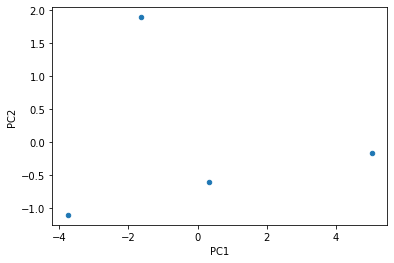

In [145]:
from sklearn.decomposition import PCA

pca = PCA(2)

df_Q1_pca_graph = pd.DataFrame(pca.fit_transform(df_pca_feature), columns=['PC1', 'PC2'])

df_Q1_pca_graph.plot.scatter(x = 'PC1', y = 'PC2')

#결론


#2. 연도별 게임의 트렌드가 있을까

In [ ]:
# 장르와 연도를 비교해야한다.

df_Q2 = df[['Genre', 'Year']]

# 각 지역별 판매량이 아닌 총 판매량이 필요하다
df_Q2['Total Sale'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df_Q2 = pd.pivot_table(df_Q2, index = 'Genre', columns = 'Year', values = 'Total Sale', aggfunc = 'sum')
#NaN을 0으로 
df_Q2 = df_Q2.fillna(0)
df_Q2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,340000.0,14790000.0,6500000.0,2860000.0,1850000.0,3520000.0,13740000.0,1110000.0,1740000.0,4650000.0,...,138320000.0,117500000.0,119000000.0,120780000.0,125210000.0,99010000.0,68250000.0,19840000.0,10000.0,0.0
Adventure,0.0,0.0,0.0,400000.0,0.0,0.0,0.0,4380000.0,0.0,0.0,...,20670000.0,16570000.0,15880000.0,5900000.0,6610000.0,6090000.0,8010000.0,1790000.0,0.0,0.0
Fighting,770000.0,0.0,0.0,0.0,0.0,1050000.0,0.0,5420000.0,0.0,0.0,...,32180000.0,14880000.0,22110000.0,9530000.0,7230000.0,16150000.0,7780000.0,3850000.0,0.0,0.0
Misc,2700000.0,0.0,870000.0,2140000.0,1450000.0,0.0,0.0,0.0,0.0,1280000.0,...,76900000.0,88400000.0,55770000.0,22930000.0,25660000.0,23730000.0,11660000.0,1150000.0,0.0,0.0
Platform,0.0,6920000.0,5030000.0,6930000.0,690000.0,43170000.0,9390000.0,1740000.0,27730000.0,20660000.0,...,40950000.0,31980000.0,28120000.0,18540000.0,25090000.0,8870000.0,6050000.0,2080000.0,0.0,0.0
Puzzle,0.0,2250000.0,10040000.0,780000.0,3140000.0,3210000.0,0.0,0.0,5580000.0,37750000.0,...,20280000.0,11150000.0,5100000.0,1740000.0,1000000.0,1500000.0,690000.0,0.0,0.0,0.0
Racing,0.0,480000.0,1570000.0,0.0,5950000.0,0.0,1960000.0,0.0,2140000.0,0.0,...,34090000.0,34930000.0,34960000.0,14430000.0,13020000.0,16710000.0,7920000.0,1670000.0,0.0,0.0
Role-Playing,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,4650000.0,5880000.0,2200000.0,...,47960000.0,70560000.0,53320000.0,47770000.0,30540000.0,45880000.0,36430000.0,6750000.0,40000.0,0.0
Shooter,7070000.0,10020000.0,3810000.0,490000.0,31100000.0,1000000.0,3890000.0,690000.0,510000.0,1190000.0,...,69840000.0,77440000.0,99350000.0,72840000.0,62730000.0,65990000.0,66120000.0,18170000.0,0.0,0.0


#Genre 와 연도간의 '연관성'을 파악해야하므로 
#Two sample chi square test 를 진행

귀무가설: 연도와 장르는 연관이 없다.
대립가설: 연도와 장르는 연관이 있다.

만약 p-value가 0.05 보다 작으면 귀무가설을 기각, 즉 연도와 장르는 연관이 있다

In [ ]:
print(chi2_contingency(df_Q2, correction = True))
print(chi2_contingency(df_Q2, correction = False))

(3401604559.747564, 0.0, 418, array([[2.12866188e+06, 6.98075883e+06, 5.65034515e+06, 3.28690438e+06,
        9.85093069e+06, 1.05552673e+07, 7.25466752e+06, 4.24558482e+06,
        9.23659261e+06, 1.43704242e+07, 9.65919460e+06, 6.30576953e+06,
        1.48967202e+07, 8.99790074e+06, 1.54993193e+07, 1.72386396e+07,
        3.88813397e+07, 3.93391586e+07, 4.99237733e+07, 4.87479223e+07,
        3.94311136e+07, 6.42922410e+07, 7.70994291e+07, 6.98271532e+07,
        7.99872094e+07, 8.94351030e+07, 1.00661447e+08, 1.19072024e+08,
        1.32338988e+08, 1.30270977e+08, 1.15657948e+08, 1.00729924e+08,
        7.08367024e+07, 6.91873807e+07, 6.59493886e+07, 5.12267961e+07,
        1.38597801e+07, 9.78245351e+03, 5.67382304e+04],
       [2.90808681e+05, 9.53681409e+05, 7.71925984e+05, 4.49042816e+05,
        1.34579201e+06, 1.44201547e+06, 9.91101644e+05, 5.80013637e+05,
        1.26186377e+06, 1.96322588e+06, 1.31959785e+06, 8.61467260e+05,
        2.03512619e+06, 1.22925471e+06, 2.1174507

두 경우 모두 p value 가 0.0 이 뜬다. 매우 작은 숫자라고 가정, 귀무가설을 기각
즉 장르와 연도는 연관성이 있다. 다른 말로는 연도마다 선호하는 장르가 있다는 뜻.

이제 각 연도별로 선호하는 장르를 알아본 후 트렌드를 알아보자.

#각 연도 별로 하기에는 무리가 있으므로 10년단위로 끊어서 확인할 것 이다.

#1980년대

1980년대의 각각의 장르의 총합 판매량을 구할것이다. 

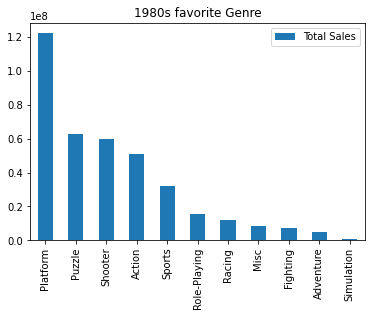

In [ ]:
#1980년대 데이터를 모은다.
df_Q2_1980 = df[(df['Year'] >= 1980) & (df['Year'] < 1990)]
df_Q2_1980 = df_Q2_1980[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_Q2_1980 = df_Q2_1980.groupby(['Genre']).sum()
df_Q2_1980 = df_Q2_1980.T
#df_Q2_1980 = df_Q2_1980.reset_index()

#총합 판매량을 더한다
df_Q2_1980_Total = [(df_Q2_1980['Action'].sum(), df_Q2_1980['Adventure'].sum(), df_Q2_1980['Fighting'].sum(), df_Q2_1980['Misc'].sum(), df_Q2_1980['Platform'].sum(), df_Q2_1980['Puzzle'].sum(), df_Q2_1980['Racing'].sum(), df_Q2_1980['Role-Playing'].sum(), df_Q2_1980['Shooter'].sum(), df_Q2_1980['Simulation'].sum(), df_Q2_1980['Sports'].sum())]
df_Q2_1980_Total = pd.DataFrame(df_Q2_1980_Total, columns = ['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports'])

df_Q2_1980_Total = df_Q2_1980_Total.T
df_Q2_1980_Total.rename(columns = {0 : 'Total Sales'}, inplace = True)
df_Q2_1980_Total = df_Q2_1980_Total.sort_values(by = 'Total Sales', ascending = False)

df_Q2_1980_Total.plot.bar(title = '1980s favorite Genre')

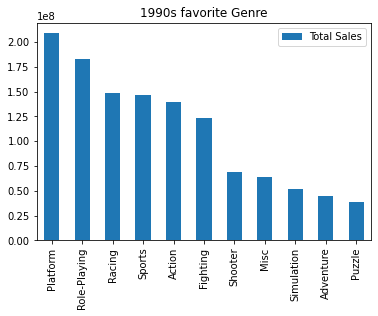

In [ ]:
#1990년대 데이터를 모은다.
df_Q2_1990 = df[(df['Year'] >= 1990) & (df['Year'] < 2000)]
df_Q2_1990 = df_Q2_1990[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_Q2_1990 = df_Q2_1990.groupby(['Genre']).sum()
df_Q2_1990 = df_Q2_1990.T
#df_Q2_1990 = df_Q2_1990.reset_index()

#총합 판매량을 더한다
df_Q2_1990_Total = [(df_Q2_1990['Action'].sum(), df_Q2_1990['Adventure'].sum(), df_Q2_1990['Fighting'].sum(), df_Q2_1990['Misc'].sum(), df_Q2_1990['Platform'].sum(), df_Q2_1990['Puzzle'].sum(), df_Q2_1990['Racing'].sum(), df_Q2_1990['Role-Playing'].sum(), df_Q2_1990['Shooter'].sum(), df_Q2_1990['Simulation'].sum(), df_Q2_1990['Sports'].sum())]
df_Q2_1990_Total = pd.DataFrame(df_Q2_1990_Total, columns = ['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports'])

df_Q2_1990_Total = df_Q2_1990_Total.T
df_Q2_1990_Total.rename(columns = {0 : 'Total Sales'}, inplace = True)
df_Q2_1990_Total = df_Q2_1990_Total.sort_values(by = 'Total Sales', ascending = False)

df_Q2_1990_Total.plot.bar(title = '1990s favorite Genre')

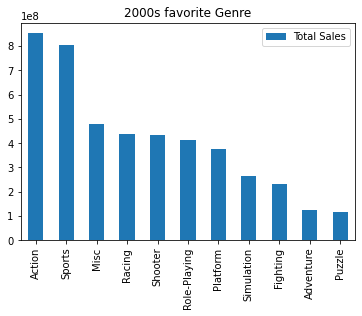

In [ ]:
#2000년대 데이터를 모은다.
df_Q2_2000 = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]
df_Q2_2000 = df_Q2_2000[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_Q2_2000 = df_Q2_2000.groupby(['Genre']).sum()
df_Q2_2000 = df_Q2_2000.T
#df_Q2_2000 = df_Q2_2000.reset_index()

#총합 판매량을 더한다
df_Q2_2000_Total = [(df_Q2_2000['Action'].sum(), df_Q2_2000['Adventure'].sum(), df_Q2_2000['Fighting'].sum(), df_Q2_2000['Misc'].sum(), df_Q2_2000['Platform'].sum(), df_Q2_2000['Puzzle'].sum(), df_Q2_2000['Racing'].sum(), df_Q2_2000['Role-Playing'].sum(), df_Q2_2000['Shooter'].sum(), df_Q2_2000['Simulation'].sum(), df_Q2_2000['Sports'].sum())]
df_Q2_2000_Total = pd.DataFrame(df_Q2_2000_Total, columns = ['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports'])

df_Q2_2000_Total = df_Q2_2000_Total.T
df_Q2_2000_Total.rename(columns = {0 : 'Total Sales'}, inplace = True)
df_Q2_2000_Total = df_Q2_2000_Total.sort_values(by = 'Total Sales', ascending = False)

df_Q2_2000_Total.plot.bar(title = '2000s favorite Genre')

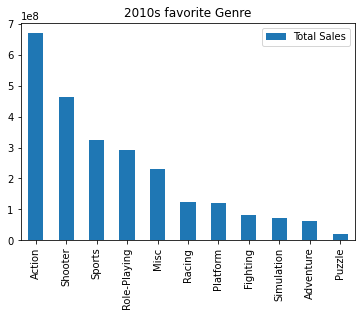

In [ ]:
#2010년대 데이터를 모은다.
df_Q2_2010 = df[(df['Year'] >= 2010) & (df['Year'] < 2020)]
df_Q2_2010 = df_Q2_2010[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_Q2_2010 = df_Q2_2010.groupby(['Genre']).sum()
df_Q2_2010 = df_Q2_2010.T
#df_Q2_2010 = df_Q2_2010.reset_index()

#총합 판매량을 더한다
df_Q2_2010_Total = [(df_Q2_2010['Action'].sum(), df_Q2_2010['Adventure'].sum(), df_Q2_2010['Fighting'].sum(), df_Q2_2010['Misc'].sum(), df_Q2_2010['Platform'].sum(), df_Q2_2010['Puzzle'].sum(), df_Q2_2010['Racing'].sum(), df_Q2_2010['Role-Playing'].sum(), df_Q2_2010['Shooter'].sum(), df_Q2_2010['Simulation'].sum(), df_Q2_2010['Sports'].sum())]
df_Q2_2010_Total = pd.DataFrame(df_Q2_2010_Total, columns = ['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports'])

df_Q2_2010_Total = df_Q2_2010_Total.T
df_Q2_2010_Total.rename(columns = {0 : 'Total Sales'}, inplace = True)
df_Q2_2010_Total = df_Q2_2010_Total.sort_values(by = 'Total Sales', ascending = False)

df_Q2_2010_Total.plot.bar(title = '2010s favorite Genre')

#결론

#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
df_Q3 = df[['Name','Platform','Year', 'Genre', 'Publisher']]
df_Q3['Total Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_Q3.sort_values(by='Total Sales', ascending =False).head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,Total Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,82740000.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40240000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380000.0
1203,Tetris,GB,1989,Puzzle,Nintendo,30260000.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,30010000.0
3014,Wii Play,Wii,2006,Misc,Nintendo,29010000.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28610000.0
10488,Duck Hunt,NES,1984,Shooter,Nintendo,28310000.0


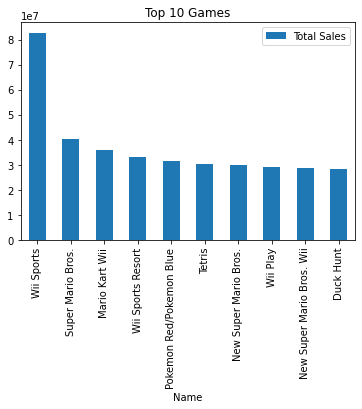

In [ ]:
df_Q3.sort_values(by ='Total Sales', ascending = False).head(10).plot.bar(x = 'Name', y = 'Total Sales', title = 'Top 10 Games')

In [ ]:
df_Q3_Platform = df_Q3.sort_values(by = 'Total Sales', ascending = False).head(50).groupby('Platform').sum()
df_Q3_Platform = df_Q3_Platform.drop('Year', axis = 1)
df_Q3_Platform.sort_values(by = 'Total Sales', ascending = False).head(10)

,Total Sales
Platform,
Wii,278470000.0
DS,171560000.0
GB,128690000.0
X360,107000000.0
NES,85830000.0
PS2,76680000.0
PS3,61630000.0
PS4,26230000.0
3DS,23540000.0


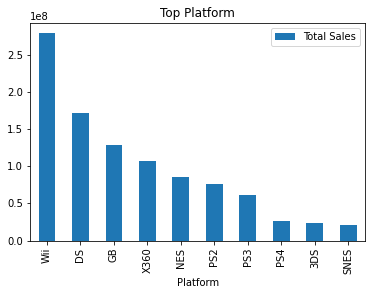

In [ ]:
df_Q3_Platform.sort_values(by = 'Total Sales', ascending = False).head(10).plot.bar(title = 'Top Platform')

#가장 최근인 2010년대에서 각각의 플랫폼 총합 판매량을 구해 소비자들이 선호하는 플랫폼을 구해보자

In [ ]:
df_Q3_2010_platform = df[['Name','Platform','Year', 'Genre', 'Publisher']]
df_Q3_2010_platform['Total Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_Q3_2010_platform = df_Q3_2010_platform[(df_Q3_2010_platform['Year'] >= 2010)]
df_Q3_2010_platform = df_Q3_2010_platform.sort_values(by='Total Sales', ascending =False).head(50).groupby('Platform').sum().sort_values(by = 'Total Sales', ascending = False)
df_Q3_2010_platform = df_Q3_2010_platform.drop('Year', axis = 1)
df_Q3_2010_platform

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total Sales
Platform,
X360,149130000.0
PS3,137530000.0
PS4,63560000.0
3DS,60700000.0
Wii,47800000.0
DS,23660000.0
XOne,7290000.0
WiiU,6960000.0


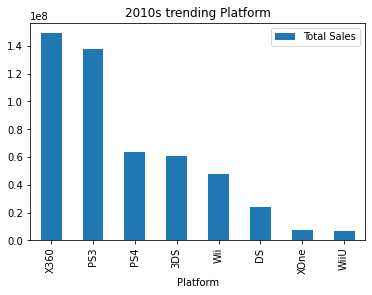

In [ ]:
df_Q3_2010_platform.plot.bar(title = '2010s trending Platform')

위의 차트에서 보이듯
1980년대 부터 2020년까지 총합 판매량은 Wii 가 압도적이였지만,
시간이 지나며 플랫폼도 발전하여 소비자들이 선호하는 플랫폼이 바뀌었다.
X360, PS3, 3DS, 그리고 PS4가 우선순위인것으로 보아, 이들의 구버전 플랫폼인 Wii, DS, 그리고 PS2 등은 최근 트랜드에서 벗어난 것 으로 보인다.

#위의 결론들을 종합해 2020년대에 참고할만한 게임 순위 차트를 만들 수 있다.
일단 일본 판매량은 다른 지역 판매량과 차이점을 두기 때문 제외시키고, 
2000년대 전까지는 Platform (콘솔) 위주의 장르가 지배적이였지만,
가장 최신 트랜드인 Action, Shooter, 그리고 Sports 를 제외한 다른 장르는 데이터에 포함시키지않는다. 
또한, 2010년대 트랜드인 PS3, PS4, 3DS, 그리고 X360 를 제외한 다른 플랫폼은 포함시키지않는다.

In [ ]:
df_Q3_ath = df[['Name','Year', 'Platform', 'Genre', 'Publisher']]
df_Q3_ath['Total Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['Other_Sales']
df_Q3_ath = df_Q3_ath[((df_Q3_ath['Genre'] == 'Action') | (df_Q3_ath['Genre'] == 'Shooter') | (df_Q3_ath['Genre'] == 'Sports')) & ((df_Q3_ath['Platform'] == 'X360')| (df_Q3_ath['Platform'] == 'PS3')| (df_Q3_ath['Platform'] == 'PS4') | (df_Q3_ath['Platform'] == '3DS'))]
df_Q3_ath = df_Q3_ath[(df_Q3_ath['Year'] >= 2000)]
df_Q3_ath.sort_values(by = 'Total Sales', ascending = False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Year,Platform,Genre,Publisher,Total Sales
3483,Grand Theft Auto V,2013,PS3,Action,Take-Two Interactive,20420000.0
10913,Grand Theft Auto V,2013,X360,Action,Take-Two Interactive,16320000.0
2809,Call of Duty: Modern Warfare 3,2011,X360,Shooter,Activision,14630000.0
6248,Call of Duty: Black Ops,2010,X360,Shooter,Activision,14530000.0
9070,Call of Duty: Black Ops 3,2015,PS4,Shooter,Activision,13890000.0
6393,Call of Duty: Black Ops II,2012,X360,Shooter,Activision,13670000.0
6236,Call of Duty: Modern Warfare 2,2009,X360,Shooter,Activision,13440000.0
4240,Call of Duty: Black Ops II,2012,PS3,Shooter,Activision,13390000.0
14120,Call of Duty: Modern Warfare 3,2011,PS3,Shooter,Activision,12980000.0
9924,Call of Duty: Black Ops,2010,PS3,Shooter,Activision,12250000.0


In [ ]:
df_Q3_ath_50 = df_Q3_ath.groupby('Name').sum().sort_values(by = 'Total Sales',ascending = False).head(10)
df_Q3_ath_50 = df_Q3_ath_50.drop('Year', axis = 1)
df_Q3_ath_50

,Total Sales
Name,
Grand Theft Auto V,48370000.0
Call of Duty: Modern Warfare 3,27610000.0
Call of Duty: Black Ops II,27060000.0
Call of Duty: Black Ops,26780000.0
Call of Duty: Modern Warfare 2,23750000.0
Call of Duty: Ghosts,22950000.0
Grand Theft Auto IV,21030000.0
Call of Duty: Black Ops 3,17360000.0
Call of Duty: Advanced Warfare,16020000.0


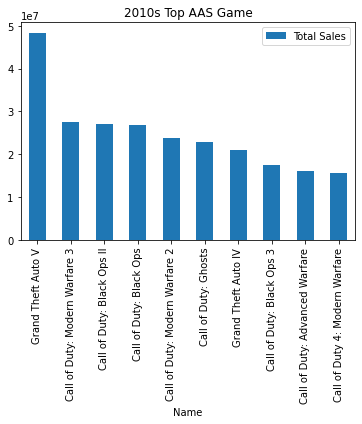

In [ ]:
df_Q3_ath_50.plot.bar(title = '2010s Top AAS Game')